## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

# Display the data table for preview

combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
mice_count = combined['Mouse ID'].value_counts()
number_of_mice = len(mice_count)
number_of_mice

249

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined.loc[combined.duplicated(subset = ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicates

array(['g989'], dtype=object)

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 



In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID

clean_data = combined[combined['Mouse ID'].isin(duplicates)==False]

In [16]:
# Checking the number of mice in the clean DataFrame.

clean_count = clean_data['Mouse ID'].value_counts()
clean_num_of_mice = len(clean_count)
clean_num_of_mice

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_drug_regimen = clean_data.groupby(['Drug Regimen'])

mean_volume = grouped_drug_regimen['Tumor Volume (mm3)'].mean()

median_volume = grouped_drug_regimen['Tumor Volume (mm3)'].median()

variance_volume = grouped_drug_regimen['Tumor Volume (mm3)'].var()

std_deviation_volume = grouped_drug_regimen['Tumor Volume (mm3)'].std()

sem_volume = grouped_drug_regimen['Tumor Volume (mm3)'].sem()



summary_df = pd.DataFrame({
    'Mean of Volume' : mean_volume,
    'Median of Volume' : median_volume,
    'Variance of Volume' : variance_volume,
    'Standard Deviation of Volume' : std_deviation_volume,
    'SEM of Volume' : sem_volume
})

summary_df


,Mean of Volume,Median of Volume,Variance of Volume,Standard Deviation of Volume,SEM of Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg = grouped_drug_regimen.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements Per Drug Regiment')

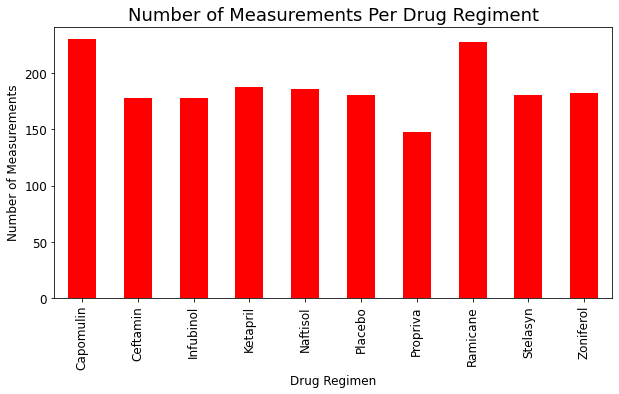

In [32]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# count of mice?

count_per_drug = grouped_drug_regimen.count()['Mouse ID']
#count_per_drug

pandas_plot = count_per_drug.plot.bar(figsize=(10,5), color = 'red', fontsize = 12)
plt.xlabel('Drug Regimen', fontsize = 12)
plt.ylabel('Number of Measurements', fontsize = 12)
plt.title('Number of Measurements Per Drug Regiment', fontsize = 18)




<Figure size 720x360 with 0 Axes>

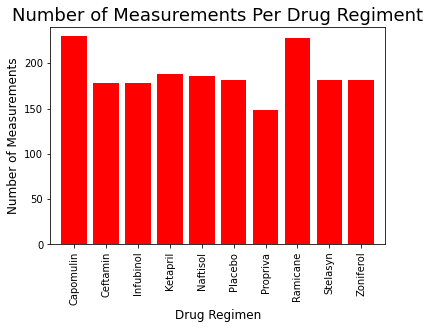

<Figure size 720x360 with 0 Axes>

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

measurements_list = count_per_drug.tolist()
# measurements_list

x_axis = count_per_drug.index.values
y_axis = measurements_list

plt.bar(x_axis, y_axis, color ='red', alpha = 1, align = 'center')
plt.xticks(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva','Ramicane','Stelasyn','Zoniferol'], rotation = 'vertical')

plt.xlim(-.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis)+10)

plt.xlabel('Drug Regimen', fontsize = 12)
plt.ylabel('Number of Measurements', fontsize = 12)
plt.title('Number of Measurements Per Drug Regiment', fontsize = 18)
plt.figure(figsize = (10,5))


Text(0.5, 1.0, 'Distribution of Female versus Male Mice')

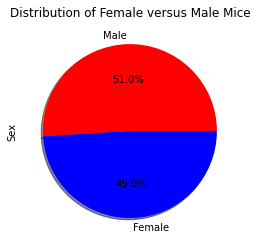

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_plot = clean_data['Sex'].value_counts()
#gender_data

gender_plot.plot.pie(colors = ['red','blue'], shadow = True, autopct= '%1.1f%%')
plt.title('Distribution of Female versus Male Mice')


Text(0.5, 1.0, 'Distribution of Female versus Male Mice')

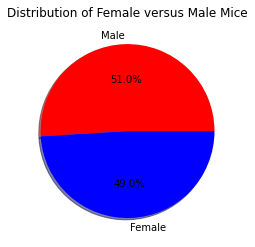

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pieplot = plt.pie(gender_plot, labels = ['Male','Female'], shadow = True,colors = ['red','blue'], autopct= '%1.1f%%')
plt.title('Distribution of Female versus Male Mice')

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin', :]
Ramicane = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane', :]
Infubinol = clean_data.loc[clean_data['Drug Regimen'] == 'Infubinol', :]
Ceftamin = clean_data.loc[clean_data['Drug Regimen'] == 'Ceftamin', :]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin.groupby('Mouse ID').max()['Timepoint']
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_df = pd.DataFrame(Capomulin_last)
MergedCapomulin = pd.merge(Capomulin_df, clean_data, on = ('Mouse ID', 'Timepoint'), how = 'left')
MergedCapomulin.head()

Ramicane_df = pd.DataFrame(Ramicane_last)
MergedRamicane = pd.merge(Ramicane_df, clean_data, on = ('Mouse ID', 'Timepoint'), how = 'left')
#MergedRamicane.head()

Infubinol_df = pd.DataFrame(Infubinol_last)
MergedInfubinol = pd.merge(Infubinol_df, clean_data, on = ('Mouse ID', 'Timepoint'), how = 'left')
#MergedInfubinol.head()

Ceftamin_df = pd.DataFrame(Ceftamin_last)
MergedCeftamin = pd.merge(Ceftamin_df, clean_data, on = ('Mouse ID', 'Timepoint'), how = 'left')
#MergedCeftamin.head()

MergedCapomulin.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [68]:
Capomulin_tumor = MergedCapomulin['Tumor Volume (mm3)']

quartiles = Capomulin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f'Capomulin lower quartile is: {lowerq}')
print(f'Capomulin upper quartile is: {upperq}')
print(f'Capomulin IQR is: {IQR}')

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f'The lower bound is {lower_bound} and anything below may be an outlier')
print(f'The upper bound is {upper_bound} and anything above may be an outlier')

Capomulin lower quartile is: 32.37735684
Capomulin upper quartile is: 40.1592203
Capomulin IQR is: 7.781863460000004
The lower bound is 20.70456164999999 and anything below may be an outlier
The upper bound is 51.83201549 and anything above may be an outlier


In [69]:
Infubinol_tumor = MergedInfubinol['Tumor Volume (mm3)']

quartiles = Infubinol_tumor.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f'Infubinol lower quartile is: {lowerq}')
print(f'Infubinol upper quartile is: {upperq}')
print(f'Infubinol IQR is: {IQR}')

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f'The lower bound is {lower_bound} and anything below may be an outlier')
print(f'The upper bound is {upper_bound} and anything above may be an outlier')

Infubinol lower quartile is: 54.04860769
Infubinol upper quartile is: 65.52574285
Infubinol IQR is: 11.477135160000003
The lower bound is 36.83290494999999 and anything below may be an outlier
The upper bound is 82.74144559000001 and anything above may be an outlier


In [70]:
Ramicane_tumor = MergedRamicane['Tumor Volume (mm3)']

quartiles = Ramicane_tumor.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f'Ramicane lower quartile is: {lowerq}')
print(f'Ramicane upper quartile is: {upperq}')
print(f'Ramicane IQR is: {IQR}')

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f'The lower bound is {lower_bound} and anything below may be an outlier')
print(f'The upper bound is {upper_bound} and anything above may be an outlier')

Ramicane lower quartile is: 31.56046955
Ramicane upper quartile is: 40.65900627
Ramicane IQR is: 9.098536719999998
The lower bound is 17.912664470000003 and anything below may be an outlier
The upper bound is 54.30681135 and anything above may be an outlier


In [71]:
Ceftamin_tumor = MergedCeftamin['Tumor Volume (mm3)']

quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f'Ceftamin lower quartile is: {lowerq}')
print(f'Ceftamin upper quartile is: {upperq}')
print(f'Ceftamin IQR is: {IQR}')

lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f'The lower bound is {lower_bound} and anything below may be an outlier')
print(f'The upper bound is {upper_bound} and anything above may be an outlier')

Ceftamin lower quartile is: 48.72207785
Ceftamin upper quartile is: 64.29983003
Ceftamin IQR is: 15.577752179999997
The lower bound is 25.355449580000002 and anything below may be an outlier
The upper bound is 87.66645829999999 and anything above may be an outlier


{'whiskers': [<matplotlib.lines.Line2D at 0x7f83fdcf4f98>,
 'caps': [<matplotlib.lines.Line2D at 0x7f83fdd016d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f83fdcf4c88>,
 'medians': [<matplotlib.lines.Line2D at 0x7f83fdcf4b00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f83fdd01eb8>,
 'means': []}

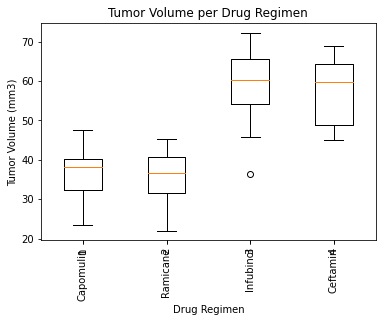

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

tumor_data = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
DrugRegimen_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

box_plot = plt.figure()
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume per Drug Regimen')
plt.xticks([1,2,3,4],DrugRegimen_list, rotation = 'vertical')
plt.boxplot(tumor_data)



## Line and Scatter Plots

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = Capomulin.loc[Capomulin['Mouse ID'] == 'b128',:]

mouse_capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


Text(0.5, 1.0, 'Treatment of Capomulin in Mouse B128')

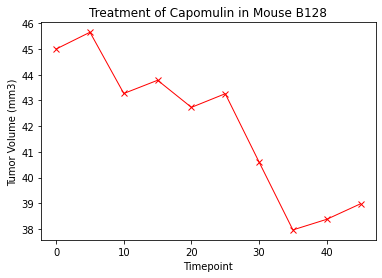

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_axis = mouse_capomulin['Timepoint']
y_axis = mouse_capomulin['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, linewidth = 1, marker = 'x', color = 'red')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Treatment of Capomulin in Mouse B128')





## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


